In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
#file_path = 'data.csv'
#data = pd.read_csv(file_path, delimiter=';')
file_path = 'oversample.csv'
data = pd.read_csv(file_path)
# Separate the features and the target variable
X = data.drop('Target', axis=1)
y = data['Target']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a pipeline with preprocessor and Random Forest model
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestClassifier(random_state=0))])

# Define the parameter grid for Random Forest
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Instantiate the grid search
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Output the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate on the test set
best_model = grid_search.best_estimator_
preds = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, preds)

# Output the test accuracy
print("Test Set Accuracy:", test_accuracy)


Best Parameters: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best Score: 0.880188679245283
Test Set Accuracy: 0.8974358974358975


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
#file_path = 'data.csv'
#data = pd.read_csv(file_path, delimiter=';')
file_path = 'oversample.csv'
data = pd.read_csv(file_path)
# Separate the features and the target variable
X = data.drop('Target', axis=1)
y = data['Target']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a pipeline with preprocessor and Random Forest model
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestClassifier(random_state=0))])

# Define the parameter grid for Random Forest
param_grid = {
    'model__n_estimators': [300],
    'model__max_depth': [None],
    'model__min_samples_split': [2],
    'model__min_samples_leaf': [1]
}

# Instantiate the grid search
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


# Evaluate on the test set
best_model = grid_search.best_estimator_
preds = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, preds)

# Output the test accuracy
print("Test Accuracy:", test_accuracy*100)


Test Accuracy: 89.81900452488688


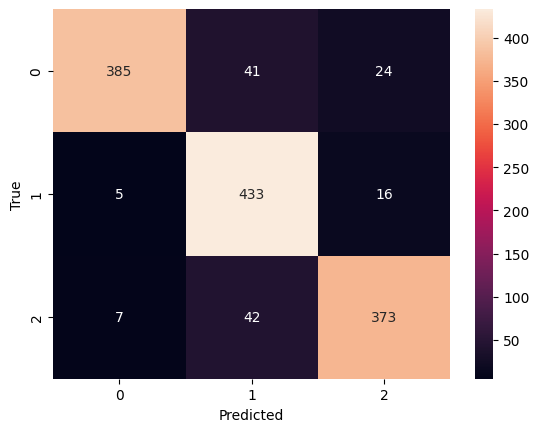

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))


              precision    recall  f1-score   support

     Dropout       0.97      0.86      0.91       450
    Enrolled       0.84      0.95      0.89       454
    Graduate       0.90      0.88      0.89       422

    accuracy                           0.90      1326
   macro avg       0.90      0.90      0.90      1326
weighted avg       0.90      0.90      0.90      1326



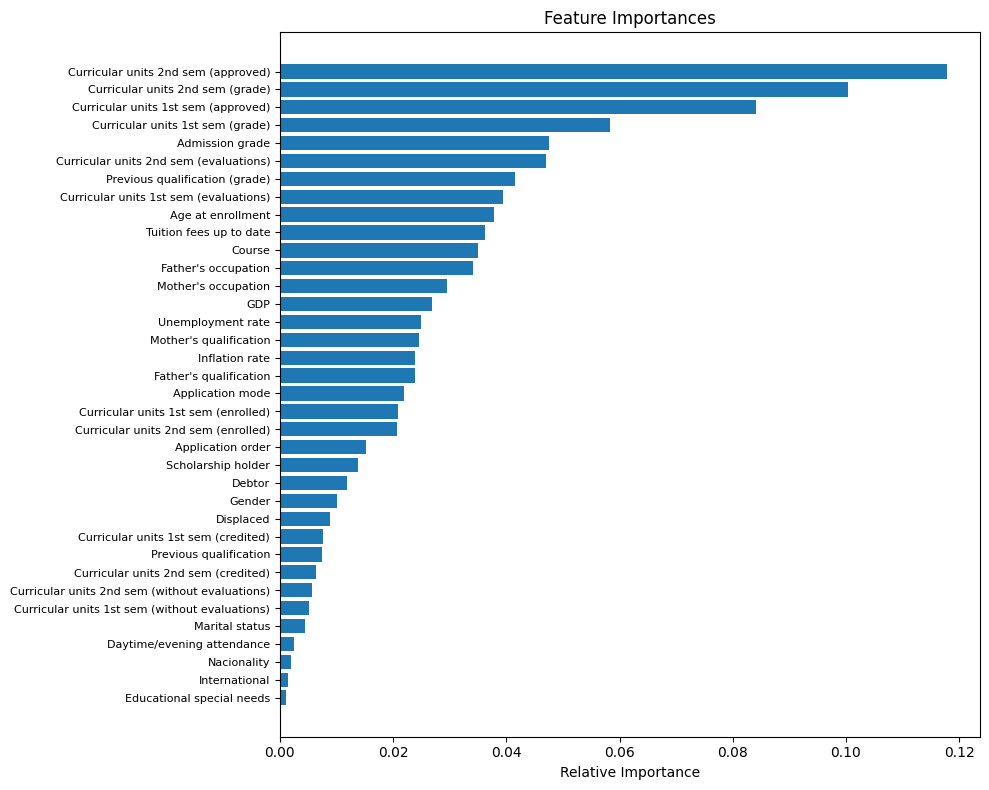

In [12]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_


plt.figure(figsize=(10, 8))
sorted_idx = np.argsort(feature_importances)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importances[sorted_idx], align='center')
plt.yticks(pos, np.array(X_train.columns)[sorted_idx], fontsize=8, rotation=0)
plt.xlabel('Relative Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()
